# METHEOROLOGICAL STATIONS - FEATURE ENGINEERING
### BASED ON INMET AND ALERTA-RIO METHEOROLOGICAL STATIONS DATA

---
## Define Functions

#### Change project root directory

In [1]:
cd ../

C:\Users\luisr\Desktop\Repositories\Data Science Projects\Hackaton COR IV - Centro de Operações do RJ\ACELERAÇÃO


#### Import modules and libraries

In [2]:
import os, json, pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns; sns.set()
from IPython.display import clear_output as co

---
## Load & Preprocess Data

In [3]:
from Modulos.waterbags import waterbag_project

project = waterbag_project(load_stations=True, time_serie=None, freq=None, load_waterbags=False)

inmet = project.inmet
alerta_rio = project.alerta_rio

---
# Feature Engineering - INMET

In [5]:
readings, stations = (inmet.columns.map(lambda col: col.split(' - ')[i]) for i in (0, 1))

### Metheorological features

In [6]:
cum_1h = inmet.columns[readings == readings[0]]
cols = cum_1h
windows = [2, 3, 4, 5, 6, 7, 8, 12, 16, 20, 24, 32, 40, 48, 60, 72, 84]
station_labels = stations[readings==readings[0]]
titles = ['acumulado_chuva_{}_h' + ' - ' + station for station in station_labels]

cum_sums = []
for window in windows:
    roll_df = inmet[cols].rolling(window).sum()
    roll_df.columns = [title.format(window) for title in titles]
    cum_sums.append(roll_df)
cum_sums = pd.concat(cum_sums, 1)

display(cum_sums.shape)

#### Save and reload result

In [23]:
# cum_sums.to_csv('Dados/Feature Engineering/inmet_2-84h.csv', index=True)

cum_sums = pd.read_csv('Dados/Feature Engineering/inmet_2-84h.csv', index_col=0)

#### Missing values

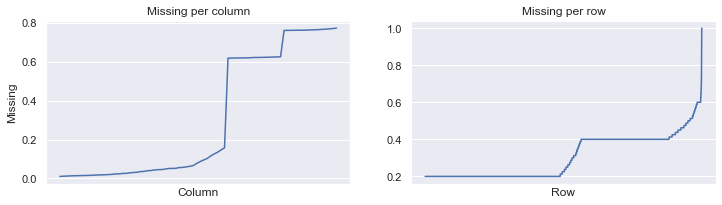

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
cum_sums.isna().mean().sort_values().plot(xticks=[], ax=ax[0])
cum_sums.isna().mean(1).sort_values().reset_index(drop=True).plot(xticks=[], ax=ax[1])
ax[0].set(title='Missing per column', xlabel='Column', ylabel='Missing')
ax[1].set(title='Missing per row', xlabel='Row')
plt.show()

---
# Feature Engineering - ALERTA-RIO

In [10]:
readings, stations = (alerta_rio.columns.map(lambda col: col.split(' - ')[i]) for i in (0, 1))

### 1h Rain Cumulative sum

#### Generating 30, 45 acumulated

In [11]:
target  = 'acumulado_chuva_15_min'

cols = alerta_rio.columns[readings == target]
station_labels = stations[readings == target]
titles = ['acumulado_chuva_{}_min' + ' - ' + station for station in station_labels]

windows = [2, 3]
hours = 1 / 15

alerta_cum_15 = []
for i, window in enumerate(windows):
    co(wait=True); print(f'{i+1}/{len(windows)}')
    roll_df = alerta_rio[cols].rolling(window).sum()
    roll_df.columns = [title.format(int(window / hours)) for title in titles]
    alerta_cum_15.append(roll_df)
alerta_cum_15 = pd.concat(alerta_cum_15, 1)

display(alerta_cum_15.shape)

2/2


(239155, 66)

#### Save result

In [13]:
# alerta_cum_15.to_csv('Dados/Feature Engineering/alertario_15-45min.csv', index=True)

#### Generating 15 frequency acumulated

In [19]:
target  = 'acumulado_chuva_15_min'

cols = alerta_rio.columns[readings == target]
station_labels = stations[readings == target]
titles = ['acumulado_chuva_{}_h' + ' - ' + station for station in station_labels]

windows = list(range(5, 4 * 4))
hours = 1

alerta_cum_24 = []
for i, window in enumerate(windows):
    co(wait=True); print(f'{i+1}/{len(windows)}')
    roll_df = alerta_rio[cols].rolling(window).sum()
    roll_df.columns = [title.format(int(window / hours)) for title in titles]
    alerta_cum_24.append(roll_df)
alerta_cum_24 = pd.concat(alerta_cum_24, 1)

display(alerta_cum_24.shape)

11/11


(239155, 363)

#### Save result

In [20]:
alerta_cum_24.to_csv('Dados/Feature Engineering/alertario_1-4h.csv', index=True)

#### Generating 1, 2, 3... hours acumulated

In [25]:
target  = 'acumulado_chuva_1_h'

cols = alerta_rio.columns[readings == target]
station_labels = stations[readings == target]
titles = ['acumulado_chuva_{}_h' + ' - ' + station for station in station_labels]

windows = [5, 6, 7, 8, 12, 16, 20, 32, 40, 48, 60, 72, 84]
hours = 1

alerta_cum_48 = []
for window in windows:
    roll_df = alerta_rio[cols].rolling(window).sum()
    roll_df.columns = [title.format(int(window / hours)) for title in titles]
    alerta_cum_48.append(roll_df)
alerta_cum_48 = pd.concat(alerta_cum_48, 1)

display(alerta_cum_48.shape)

(239155, 429)

#### Save result

In [26]:
alerta_cum_48.to_csv('Dados/Feature Engineering/alertario_5-84h.csv', index=True)

### Reload and concat Alerta-Rio results

In [29]:
feat_path = 'Dados/Feature Engineering/'
feat_files = ('alertario_15-45min.csv', 'alertario_1-4h.csv', 'alertario_5-84h.csv')

alerta_eng = pd.concat([pd.read_csv(feat_path + file) for file in feat_files], 1)

#### Missing values

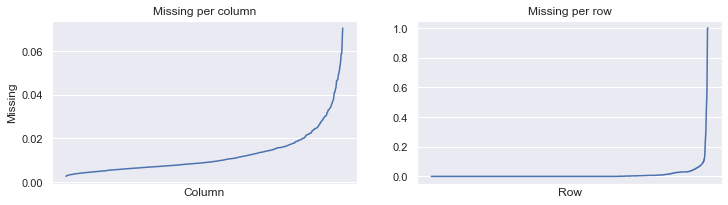

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
alerta_eng.isna().mean().sort_values().plot(xticks=[], ax=ax[0])
alerta_eng.isna().mean(1).sort_values().reset_index(drop=True).plot(xticks=[], ax=ax[1])
ax[0].set(title='Missing per column', xlabel='Column', ylabel='Missing')
ax[1].set(title='Missing per row', xlabel='Row')
plt.show()

---